#### SUMMARY STATISTICS

<br>

## NBA Trends
<hr>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

nba = pd.read_csv('nba_games.csv')

In [3]:
nba_2010 = nba[nba.year_id == 2010]
nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


In [4]:
nba_2014 = nba[nba.year_id == 2014]
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


### Analyzing Relationships Between Quantitative and Qualitative (Categorical) 

In [5]:
knicks_pts_2010 = nba_2010.pts[nba.fran_id == 'Knicks']
nets_pts_2010 = nba_2010.pts[nba.fran_id == 'Nets']

In [12]:
knicks_pts_2010_mean = knicks_pts_2010.mean()
nets_pts_2010_mean = nets_pts_2010.mean()
diff_means_2010 = np.abs(knicks_pts_2010_mean - nets_pts_2010_mean)
print("Mean Difference in 2010: " + str(diff_means_2010))

Mean Difference in 2010: 9.731707317073173


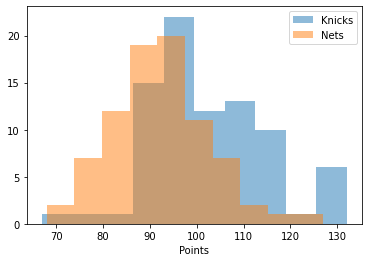

In [8]:
#doesn't need 'normed = True' in jupyter
plt.hist(knicks_pts_2010, label = 'Knicks', alpha = 0.5)
plt.hist(nets_pts_2010, label = 'Nets', alpha = 0.5)
plt.xlabel("Points")
plt.legend()
plt.show()

In [9]:
knicks_pts_2014 = nba_2014.pts[nba.fran_id == 'Knicks']
nets_pts_2014 = nba_2014.pts[nba.fran_id == 'Nets']

In [13]:
knicks_pts_2014_mean = np.mean(knicks_pts_2014)
nets_pts_2014_mean = np.mean(nets_pts_2014)
#print(knicks_pts_2014_mean)
#print(nets_pts_2014_mean)
diff_means_2014 = np.abs(knicks_pts_2014_mean - nets_pts_2014_mean)
print("Mean Difference in 2014: " + str(diff_means_2014))

Mean Difference in 2014: 0.44706798131809933


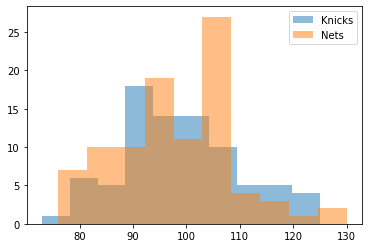

In [15]:
plt.hist(knicks_pts_2014, label = 'Knicks', alpha = 0.5)
plt.hist(nets_pts_2014, label = 'Nets', alpha = 0.5)
plt.legend()
plt.show()

<hr>
*For the rest of this project we will focus on only 2010 data*

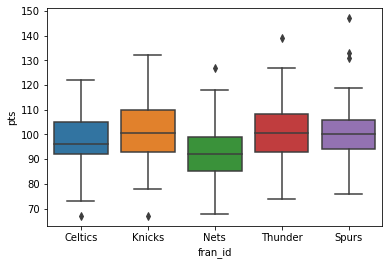

In [18]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

There is no association between the names of teams, and how many points they score.

### Analyzing Relationships Between Qualitative (Categorical) Variables

In [19]:
game_result = nba_2010['game_result']
game_location = nba_2010['game_location']

In [20]:
location_result_freq = pd.crosstab(game_result, game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [21]:
location_result_proportions = location_result_freq / len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [23]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(np.round(expected))

[[119. 119.]
 [106. 106.]]


In [24]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(chi2)

6.501704455367053


Because the Chi-Square Statistic is so small, it indicates there is no association between the locations and the results of the game.

### Analyzing Relationships Between Quantitative Variables

In [25]:
forecast = nba_2010['forecast']
point_diff = nba_2010['point_diff']

In [33]:
cov_fore_point = np.cov(forecast, point_diff)
print(cov_fore_point)

[[5.22668307e-02 1.37461257e+00]
 [1.37461257e+00 1.86559287e+02]]


Covariance is 1.37

In [34]:
correlation_fore_point, p = pearsonr(forecast, point_diff)
print(correlation_fore_point)

0.4402088708468084


The closer 'r' is to 0 means there is no correlation.

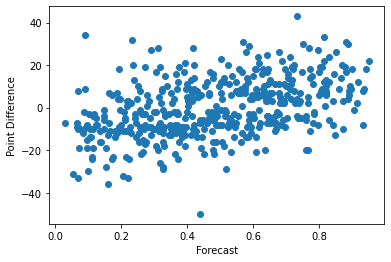

In [32]:
plt.scatter(forecast, point_diff)
plt.xlabel("Forecast")
plt.ylabel("Point Difference")
plt.show()